# 活性化関数(Activation function)
- シグモイド: 滑らか
- ReLU (Rectified Linear Unit)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(-6, 6, 0.1)

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

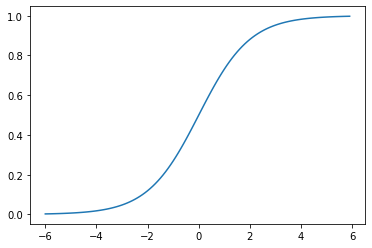

In [11]:
y = sigmoid(x)
plt.plot(x, y)

In [12]:
def relu(x):
    return np.maximum(x, 0)

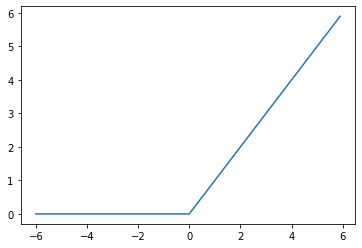

In [13]:
y = relu(x)
plt.plot(x, y)

# 出力層の設計
## 恒等関数
- 回帰で使う

## ソフトマックス関数
- 分類問題で使う
- 値域[0, 1)で、和が1（確率として解釈できる
- 入力の大小関係を変えない

In [34]:
def softmax(a):
    exp = np.exp(a - np.max(a))
    return exp / np.sum(exp)

In [15]:
np.sum(softmax(np.array([1,3,5,0,10])))

1.0

In [37]:
softmax(np.array([1010, 1000, 990]))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

# MNISTデータセットを使って遊ぶ

In [18]:
from dataset.mnist import load_mnist
from PIL import Image

In [19]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [20]:
train, test = load_mnist(normalize=False)
x_train, y_train = train
x_test, y_test = test

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [22]:
img = x_train[0]
label = y_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

5
(784,)
(28, 28)


In [24]:
img_show(img) # show image in the other window

## サンプルのニューラルネットで推論する

In [26]:
import pickle

In [28]:
with open('deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
    network = pickle.load(f)

In [48]:
# n: network
def predict(n, x):
    a1 = np.dot(x,  n['W1']) + n['b1']
    z1 = sigmoid(a1)
    a2 = np.dot(z1, n['W2']) + n['b2']
    z2 = sigmoid(a2)
    a3 = np.dot(z2, n['W3']) + n['b3']
    y = softmax(a3)

    return y

In [49]:
(_, _), (x, t) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

accuracy_count = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_count += 1

print("Accuracy:", float(accuracy_count) / len(x))

Accuracy: 0.9352
